In [12]:
import pandas as pd
import os

In [13]:
import glob

In [14]:
files = glob.glob("results/**/SW-*",recursive=True)

In [15]:
folder = {}

In [16]:
for file in files:
    directory = '.'.join(file.split('/')[:-1])
    try:
        folder[directory].append(pd.read_pickle(file).T)
    except KeyError:
        folder[directory] = [pd.read_pickle(file).T]
    #os.remove(file)
from ast import literal_eval

append  ={}
#metrics = glob.glob("metrics/*",recursive=True)
#for metric in metrics:
#    append[f'results.{metric.split("/")[1][:-4]}']=pd.read_csv(metric,index_col=0,dtype=object)


In [17]:
to_series= lambda x: pd.Series(x) if type(x) is dict else pd.Series(literal_eval(x.replace('array(','').replace(', dtype=float32)','')))

In [18]:
#TODO
#Delete pickles
# phenotype.py check in this file if model already exists..
for key in folder:
    #print('New',key)
    append[key] = pd.concat(folder[key]).sort_index()
    #try:
    #    old = pd.read_csv(f'./metrics/{key[8:]}.csv',index_col=0)
    #    append[key] = pd.concat((append[key],old))
    #    append[key] = append[key].groupby(append[key].index).first()
    #except FileNotFoundError:
    #    print(key[8:],'does not exist')
    #append[key].to_csv(f'./metrics/{key[8:]}.csv')

In [19]:
def get_keys(target:str,keys:list):
    lst = keys
    res = []
    for item in lst:
        if target in item:
            res.append(item)
    return res

In [20]:
lst = list(append.keys())

In [21]:
def get_default(dataset):
    dataset = get_keys(dataset,lst)
    phenotype = get_keys('phenotype',dataset)
    ccs = get_keys('ccs',phenotype)
    dropout = get_keys('dropout',ccs)
    e_25 = get_keys('25.256',dropout)
    return e_25

In [24]:
import pickle

In [25]:
pickle.dump(append, open("results.pk", "wb"))

In [22]:
append

{"results.eICU.['diagnoses'].['phenotype'].replicate.its:1.dropout.ccs.[283].25.256.ancestry:full":                    epochs                                               loss  \
 SW-Phenotype-0-256     24  [0.07494156872448714, 0.06112751048868117, 0.0...   
 SW-Phenotype-0-512     24  [0.07076586612864681, 0.059768562893504684, 0....   
 SW-Phenotype-1-512     24  [0.06492768471007762, 0.05874862546182197, 0.0...   
 SW-Phenotype-2-512     24  [0.06382194760700931, 0.0589814774044182, 0.05...   
 
                                                             phenotype  \
 SW-Phenotype-0-256  {'R@5': 0.4761911, 'P@5': 0.29590523, 'R@10': ...   
 SW-Phenotype-0-512  {'R@5': 0.4781183, 'P@5': 0.2947206, 'R@10': 0...   
 SW-Phenotype-1-512  {'R@5': 0.48199847, 'P@5': 0.29482362, 'R@10':...   
 SW-Phenotype-2-512  {'R@5': 0.47053394, 'P@5': 0.28740665, 'R@10':...   
 
                            time  
 SW-Phenotype-0-256  1800.030812  
 SW-Phenotype-0-512  2711.575902  
 SW-Phenotype-1-5

In [11]:
results = []

In [12]:
idxmx ='SW-Phenotype-1-512'

In [13]:
metrics = ["R@5","R@10","R@30"]
datasets = ['mimic','eicu']
tuples = [datasets,metrics]

In [14]:
index = pd.MultiIndex.from_product(tuples)

In [15]:
df = append["results.mimic.['diagnoses'].['phenotype'].normal.its:1.dropout.icd9_level3.[1778].25.256.ancestry:full"]
mimic = df.phenotype.apply(to_series)
print(mimic[['P@5',"P@10",'P@20']].loc[idxmx].to_latex())

\begin{tabular}{ll}
\toprule
{} & SW-Phenotype-1-512 \\
\midrule
P@5  &            0.51872 \\
P@10 &          0.4064533 \\
P@20 &          0.2869067 \\
\bottomrule
\end{tabular}



In [208]:
df = append["results.mimic.['diagnoses'].['phenotype'].normal.its:1.dropout.ccs.[283].25.256.ancestry:full"]
df.phenotype.apply(to_series).loc[idxmx]


R@5      0.5981778
P@5      0.5747201
R@10      0.543553
P@10    0.44426668
R@15    0.57325625
P@15    0.36775112
R@20    0.62421274
P@20     0.3168267
R@25      0.672428
P@25    0.27925333
R@30      0.714664
P@30    0.25018668
Name: SW-Phenotype-1-512, dtype: object

In [209]:
df = append["results.mimic.['diagnoses'].['phenotype'].normal.its:1.dropout.ccs.[283].25.256.ancestry:full"]
mimic = df.phenotype.apply(to_series)
df = append["results.eICU.['diagnoses'].['phenotype'].normal.its:1.dropout.ccs.[283].25.256.ancestry:full"]
eicu = df.phenotype.apply(to_series)
eicu = eicu.loc[idxmx][metrics]
eicu.name = "Phenotype Prediction (CCS)"
eicu = eicu.to_frame().T
mimic = mimic.loc[idxmx][metrics]
mimic.name = "Phenotype Prediction (CCS)"
mimic = mimic.to_frame().T
df = pd.concat([mimic,eicu],axis=1)
df.columns=index
ccs = df.astype(float).round(3).copy()
ccs
results.append(ccs)

In [210]:
df = append["results.mimic.['diagnoses'].['phenotype'].normal.its:1.dropout.ccs.[263].25.256"]
mimic = df.phenotype.apply(to_series)
df = append["results.eICU.['diagnoses'].['phenotype'].normal.its:1.dropout.ccs.[174].25.256"]
eicu = df.phenotype.apply(to_series)
eicu = eicu.loc[idxmx][metrics]
eicu.name = "Phenotype Prediction (CCS)*"
eicu = eicu.to_frame().T
mimic = mimic.loc[idxmx][metrics]
mimic.name = "Phenotype Prediction (CCS)*"
mimic = mimic.to_frame().T
df = pd.concat([mimic,eicu],axis=1)
df.columns=index
ccs_ = df.astype(float).round(3).copy()
ccs_
results.append(ccs_)

KeyError: "results.mimic.['diagnoses'].['phenotype'].normal.its:1.dropout.ccs.[263].25.256"

In [ ]:
#CHANGE DIMENSIONALITY
df = append["results.mimic.['diagnoses'].['phenotype'].normal.its:1.dropout.icd9_level3.[1778].25.256"]
mimic = df.phenotype.apply(to_series)
df = append["results.eICU.['diagnoses'].['phenotype'].normal.its:1.dropout.icd9_level3.[1778].25.256"]
eicu = df.phenotype.apply(to_series)

eicu = eicu.loc[idxmx][metrics]
eicu.name = "Phenotype Prediction (3-digit)"
eicu = eicu.to_frame().T
mimic = mimic.loc[idxmx][metrics]
mimic.name = "Phenotype Prediction (3-digit)"
mimic = mimic.to_frame().T
df = pd.concat([mimic,eicu],axis=1)
df.columns=index
icd9_3 = df.astype(float).round(3).copy()
icd9_3
results.append(icd9_3)

In [ ]:
#Change n classes to match the 3-digit format..
df = append["results.mimic.['diagnoses'].['phenotype'].normal.its:1.dropout.icd9_level3.[957].25.256"]
mimic = df.phenotype.apply(to_series)
df = append["results.eICU.['diagnoses'].['phenotype'].normal.its:1.dropout.icd9_level3.[341].25.256"]
eicu = df.phenotype.apply(to_series)

eicu = eicu.loc[idxmx][metrics]
eicu.name = "Phenotype Prediction (3-digit)*"
eicu = eicu.to_frame().T
mimic = mimic.loc[idxmx][metrics]
mimic.name = "Phenotype Prediction (3-digit)*"
mimic = mimic.to_frame().T
df = pd.concat([mimic,eicu],axis=1)
df.columns=index
icd9_3_ = df.astype(float).round(3).copy()
icd9_3_
results.append(icd9_3_)

In [ ]:
df = append["results.mimic.['diagnoses'].['phenotype'].normal.its:1.dropout.cat_level.[184].25.256"]
mimic = df.phenotype.apply(to_series)
df = append["results.eICU.['diagnoses'].['phenotype'].normal.its:1.dropout.cat_level.[184].25.256"]
eicu = df.phenotype.apply(to_series)

eicu = eicu.loc[idxmx][metrics]
eicu.name = "Phenotype Prediction (Category)"
eicu = eicu.to_frame().T
mimic = mimic.loc[idxmx][metrics]
mimic.name = "Phenotype Prediction (Category)"
mimic = mimic.to_frame().T
df = pd.concat([mimic,eicu],axis=1)
df.columns=index
cat_level = df.astype(float).round(3).copy()
results.append(cat_level)


In [ ]:
df = append["results.mimic.['diagnoses'].['phenotype'].normal.its:1.dropout.cat_level.[151].25.256"]
mimic = df.phenotype.apply(to_series)
df = append["results.eICU.['diagnoses'].['phenotype'].normal.its:1.dropout.cat_level.[104].25.256"]
eicu = df.phenotype.apply(to_series)

eicu = eicu.loc[idxmx][metrics]
eicu.name = "Phenotype Prediction (Category)*"
eicu = eicu.to_frame().T
mimic = mimic.loc[idxmx][metrics]
mimic.name = "Phenotype Prediction (Category)*"
mimic = mimic.to_frame().T
df = pd.concat([mimic,eicu],axis=1)
df.columns=index
cat_level_ = df.astype(float).round(3).copy()
results.append(cat_level_)

In [ ]:
df = append["results.mimic.['diagnoses'].['phenotype'].normal.its:1.dropout.all.[14567].25.256"]
mimic = df.phenotype.apply(to_series)
df = append["results.eICU.['diagnoses'].['phenotype'].normal.its:1.dropout.all.[14567].25.256"]
eicu = df.phenotype.apply(to_series)
eicu = eicu.loc[idxmx][metrics]
eicu.name = "Phenotype Prediction (ICD-9)"
eicu = eicu.to_frame().T
mimic = mimic.loc[idxmx][metrics]
mimic.name = "Phenotype Prediction (ICD-9)"
mimic = mimic.to_frame().T
df = pd.concat([mimic,eicu],axis=1)
df.columns=index 
icd = df.astype(float).round(3).copy()
results.append(icd)

In [ ]:
df = append["results.mimic.['diagnoses'].['phenotype'].normal.its:1.dropout.all.[3786].25.256"]
mimic = df.phenotype.apply(to_series)
df = append["results.eICU.['diagnoses'].['phenotype'].normal.its:1.dropout.all.[858].25.256"]
eicu = df.phenotype.apply(to_series)

eicu = eicu.loc[idxmx][metrics]
eicu.name = "Phenotype Prediction (ICD-9)*"
eicu = eicu.to_frame().T
mimic = mimic.loc[idxmx][metrics]
mimic.name = "Phenotype Prediction (ICD-9)*"
mimic = mimic.to_frame().T
df = pd.concat([mimic,eicu],axis=1)
df.columns=index 
icd = df.astype(float).round(3).copy()
results.append(icd)


In [ ]:
pd.concat(results)

In [ ]:
print(pd.concat(results).to_latex())

In [211]:
raise Exception("STOP")

Exception: STOP

In [212]:
df = append["results.mimic.['diagnoses', 'procedures'].['phenotype', 'treatment'].normal.its:1.dropout.ccs.[283, 231].25.256"]
phenotype = df.phenotype.apply(to_series)
treatment = df.treatment.apply(to_series)

KeyError: "results.mimic.['diagnoses', 'procedures'].['phenotype', 'treatment'].normal.its:1.dropout.ccs.[283, 231].25.256"

In [13]:
df = append["results.mimic.['diagnoses'].['mortality'].normal.its:1.dropout.ccs.[1].25.256.ancestry:full"]
mortality = df.mortality.apply(to_series)
mortality

,sensivity,tp,fn,fp,tn,specificity,died,accuracy
SW-Phenotype-1-512,0.409183,606.0,875.0,473.0,9676.0,0.953394,1481.0,0.884093


In [15]:
df = append["results.mimic.['diagnoses'].['mortality@30'].normal.its:1.dropout.ccs.[1].25.256.ancestry:full"]
mortality = df["mortality@30"].apply(to_series)
mortality

KeyError: "results.mimic.['diagnoses'].['mortality@30'].normal.its:1.dropout.ccs.[1].25.256.ancestry:full"

In [16]:
get_keys('mortality',lst)

["results.mimic.['diagnoses'].['mortality'].normal.its:1.dropout.ccs.[1].25.256.ancestry:full",
 "results.mimic.['diagnoses'].['phenotype', 'mortality'].normal.its:1.dropout.ccs.[283, 1].25.256.ancestry:full",
 "results.mimic.['diagnoses'].['phenotype', 'mortality'].normal.its:1.dropout.all.[14567, 1].25.256.ancestry:full",
 "results.mimic.['diagnoses'].['phenotype', 'mortality@90'].normal.its:1.dropout.ccs.[283, 1].25.256.ancestry:full"]

In [14]:
df = append["results.mimic.['diagnoses'].['phenotype', 'mortality'].normal.its:1.dropout.ccs.[283,1].25.256.ancestry:full"]
mortality = df.mortality.apply(to_series)
mortality

KeyError: "results.mimic.['diagnoses'].['phenotype', 'mortality'].normal.its:1.dropout.ccs.[283,1].25.256.ancestry:full"

In [14]:
get_keys('mortality',lst)

["results.mimic.['diagnoses'].['mortality'].normal.its:1.dropout.ccs.[1].25.256.ancestry:full",
 "results.mimic.['diagnoses'].['phenotype', 'mortality'].normal.its:1.dropout.ccs.[283, 1].25.256.ancestry:full",
 "results.mimic.['diagnoses'].['phenotype', 'mortality'].normal.its:1.dropout.all.[14567, 1].25.256.ancestry:full",
 "results.mimic.['diagnoses'].['phenotype', 'mortality@30'].normal.its:1.dropout.ccs.[283, 1].25.256.ancestry:full",
 "results.mimic.['diagnoses'].['phenotype', 'mortality@90'].normal.its:1.dropout.ccs.[283, 1].25.256.ancestry:full",
 "results.mimic.['diagnoses'].['mortality@30'].normal.its:1.dropout.ccs.[1].25.256.ancestry:full"]

In [19]:
df = append["results.mimic.['diagnoses'].['mortality'].normal.its:1.dropout.ccs.[1].25.256.ancestry:full"]
mortality = df.mortality.apply(to_series)
mortality

,sensivity,tp,fn,fp,tn,specificity,died,accuracy
SW-Phenotype-0-512,0.444522,633.0,791.0,454.0,9752.0,0.955516,1424.0,0.892949
SW-Phenotype-1-512,0.409183,606.0,875.0,473.0,9676.0,0.953394,1481.0,0.884093


In [39]:
df = append["results.mimic.['diagnoses'].['mortality@30'].normal.its:1.dropout.ccs.[1].25.256.ancestry:full"]
mortality_30 = df["mortality@30"].apply(to_series)
mortality_30

,sensivity,tp,fn,fp,tn,specificity,died,accuracy
SW-Phenotype-0-512,0.990164,302.0,3.0,55.0,6.0,0.098361,305.0,0.841530
SW-Phenotype-1-512,0.980328,299.0,6.0,51.0,10.0,0.163934,305.0,0.844262
SW-Phenotype-2-512,0.980328,299.0,6.0,51.0,10.0,0.163934,305.0,0.844262


In [45]:
df = append["results.mimic.['diagnoses'].['phenotype', 'mortality@30'].normal.its:1.dropout.ccs.[283, 1].25.256.ancestry:full"]
mortality_30 = df["mortality@30"].apply(to_series)
phenotype = df.phenotype.apply(to_series)

In [48]:
phenotype[["R@5","R@10","R@30"]]

,R@5,R@10,R@30
SW-Phenotype-0-512-causal:False,0.42518622,0.38018644,0.5807714
SW-Phenotype-1-512-causal:False,0.3946462,0.3675989,0.5671719
SW-Phenotype-2-512-causal:False,0.39702046,0.36566016,0.56474644


In [51]:
print(mortality_30.loc[["SW-Phenotype-1-512-causal:False"]].to_latex(caption='TBD'))

\begin{table}
\centering
\caption{TBD}
\begin{tabular}{lrrrrrrrr}
\toprule
{} &  sensivity &     tp &   fn &    fp &   tn &  specificity &   died &  accuracy \\
\midrule
SW-Phenotype-1-512-causal:False &   0.990323 &  307.0 &  3.0 &  48.0 &  0.0 &          0.0 &  310.0 &  0.857542 \\
\bottomrule
\end{tabular}
\end{table}



In [52]:
df = append["results.mimic.['diagnoses'].['phenotype', 'mortality'].normal.its:1.dropout.ccs.[283, 1].25.256.ancestry:full"]
mortality = df.mortality.apply(to_series)
phenotype = df.phenotype.apply(to_series)

In [55]:
print(mortality.loc[["SW-Phenotype-1-512-causal:False"]][['sensivity','specificity','accuracy']].to_latex(caption='TBD'))

\begin{table}
\centering
\caption{TBD}
\begin{tabular}{lrrr}
\toprule
{} &  sensivity &  specificity &  accuracy \\
\midrule
SW-Phenotype-1-512-causal:False &   0.319892 &     0.872255 &  0.762667 \\
\bottomrule
\end{tabular}
\end{table}



In [58]:
df = append["results.mimic.['diagnoses'].['mortality'].normal.its:1.dropout.ccs.[1].25.256.ancestry:full"]
mortality = df.mortality.apply(to_series)
mortality

,sensivity,tp,fn,fp,tn,specificity,died,accuracy
SW-Phenotype-0-512,0.444522,633.0,791.0,454.0,9752.0,0.955516,1424.0,0.892949
SW-Phenotype-1-512,0.409183,606.0,875.0,473.0,9676.0,0.953394,1481.0,0.884093


In [38]:
print(phenotype.loc[['SW-Phenotype-1-512-causal:False']][["R@5","R@10","R@30"]].to_latex(caption="TBD"))

\begin{table}
\centering
\caption{TBD}
\begin{tabular}{llll}
\toprule
{} &   R@5 &        R@10 &        R@30 \\
\midrule
SW-Phenotype-1-512-causal:False &  0.49 &  0.46168444 &  0.65229785 \\
\bottomrule
\end{tabular}
\end{table}



In [33]:
mortality.loc[['SW-Phenotype-1-512-causal:False']]

,sensivity,tp,fn,fp,tn,specificity,died,accuracy
SW-Phenotype-1-512-causal:False,0.319892,119.0,253.0,192.0,1311.0,0.872255,372.0,0.762667


In [13]:
df = append["results.mimic.['diagnoses'].['mortality'].normal.its:1.dropout.ccs.[1].25.256.ancestry:full"]
mortality = df.mortality.apply(to_series).loc[[idxmx]]

df = append["results.mimic.['diagnoses'].['mortality@30'].normal.its:1.dropout.ccs.[1].25.256.ancestry:full"]
mortality_30 = df['mortality@30'].apply(to_series).loc[[idxmx]]

df = append["results.mimic.['diagnoses'].['mortality@90'].normal.its:1.dropout.ccs.[1].25.256.ancestry:full"]
mortality_90 = df['mortality@90'].apply(to_series).loc[[idxmx]]

df = pd.concat([mortality,mortality_30,mortality_90])
df['alive'] = df['fp'] + df['tn']
df = df[['sensivity','specificity','accuracy','died','alive']]
names = ['in-hospital','mortality@30','mortality@90']
df.index = names
df

KeyError: "results.mimic.['diagnoses'].['mortality@90'].normal.its:1.dropout.ccs.[1].25.256.ancestry:full"

In [215]:
print(df.to_latex(caption='mortality'))

\begin{table}
\centering
\caption{mortality}
\begin{tabular}{lllll}
\toprule
{} & epochs &                                               loss &                                          mortality &         time \\
\midrule
SW-Phenotype-1-512 &     24 &  [0.3080752854147097, 0.2583765838920635, 0.237... &  \{'sensivity': 0.4091829844699527, 'tp': 606, '... &  8110.278678 \\
\bottomrule
\end{tabular}
\end{table}



In [216]:
df = append["results.mimic.['diagnoses'].['phenotype', 'mortality'].normal.its:1.dropout.ccs.[283, 1].25.256"]
mortality = df.mortality.apply(to_series)
phenotype = df.phenotype.apply(to_series)

KeyError: "results.mimic.['diagnoses'].['phenotype', 'mortality'].normal.its:1.dropout.ccs.[283, 1].25.256"

In [217]:
df = append["results.mimic.['diagnoses'].['phenotype', 'mortality@30'].normal.its:1.dropout.ccs.[283, 1].25.256"]
mortality_30 = df["mortality@30"].apply(to_series)
phenotype = df.phenotype.apply(to_series)

KeyError: "results.mimic.['diagnoses'].['phenotype', 'mortality@30'].normal.its:1.dropout.ccs.[283, 1].25.256"

In [218]:
mortality_30

NameError: name 'mortality_30' is not defined

In [219]:
#df = append["results.eICU.['diagnoses'].['mortality'].normal.its:1.dropout.ccs.[1].25.256"]
eicu = df.phenotype.apply(to_series)

eicu = eicu.loc[idxmx][metrics]
eicu.name = "Phenotype Prediction (ICD-9 3-digit)"
eicu = eicu.to_frame().T
mimic = mimic.loc[idxmx][metrics]
mimic.name = "Phenotype Prediction (ICD-9 3-digit)"
mimic = mimic.to_frame().T
df = pd.concat([mimic,eicu],axis=1)
df.columns=index
icd9_3 = df.copy()
icd9_3

AttributeError: 'DataFrame' object has no attribute 'phenotype'

In [220]:
df = append["results.mimic.['diagnoses'].['phenotype'].normal.its:1.masking.ccs.[283].25.256"]
mimic_m = df.phenotype.apply(to_series)
df = append["results.mimic.['diagnoses'].['phenotype'].normal.its:1.dropout.ccs.[283].25.256"]
mimic_d = df.phenotype.apply(to_series)
mimic_m = mimic_m.loc[idxmx][metrics]
mimic_m.name = 'Phenotype Masking'
mimic_m = mimic_m.to_frame().T
mimic_d = mimic_d.loc[idxmx][metrics]
mimic_d.name = 'Phenotype Dropout'
mimic_d = mimic_d.to_frame().T
df = pd.concat([mimic_m,mimic_d])
df

KeyError: "results.mimic.['diagnoses'].['phenotype'].normal.its:1.masking.ccs.[283].25.256"

In [221]:
mimic_

NameError: name 'mimic_' is not defined

In [222]:
df = append["results.eICU.['diagnoses'].['phenotype'].normal.its:1.masking.ccs.[283].25.256"]
eicu = df.phenotype.apply(to_series)

eicu = eicu.loc[idxmx][metrics]
eicu.name = "Phenotype Prediction (ICD-9 3-digit)"
eicu = eicu.to_frame().T
mimic = mimic.loc[idxmx][metrics]
mimic.name = "Phenotype Prediction (ICD-9 3-digit)"
mimic = mimic.to_frame().T
df = pd.concat([mimic,eicu],axis=1)
df.columns=index
icd9_3 = df.copy()
icd9_3

KeyError: "results.eICU.['diagnoses'].['phenotype'].normal.its:1.masking.ccs.[283].25.256"

### Mortality

In [14]:
mimic = append[ "results.mimic.['diagnoses'].['phenotype', 'mortality'].normal.its:1.dropout.ccs.[283, 1].25.256"]
mimic.index = ['-'.join(i.split('-')[2:]) for i in mimic.index]
mimic.mortality.apply(to_series)


KeyError: "results.mimic.['diagnoses'].['phenotype', 'mortality'].normal.its:1.dropout.ccs.[283, 1].25.256"

In [224]:
path = ["['mortality']"]
res = lst
for item in path:
    res = get_keys(item,res)
res

["results.mimic.['diagnoses'].['mortality'].normal.its:1.dropout.ccs.[1].25.256.ancestry:full"]

In [225]:
mimic.mortality.apply(to_series)


AttributeError: 'DataFrame' object has no attribute 'mortality'

#### Replicate

In [138]:
metrics = ["R@5","R@10","R@30"]

In [140]:
import numpy as np

In [211]:
df = append[f"results.mimic.['diagnoses'].['phenotype'].replicate.its:1.dropout.ccs.[283].25.256.ancestry:full"]
mimic_r = df.phenotype.apply(to_series)[metrics].merge(df['time'],right_index=True,left_index=True)
df = append["results.mimic.['diagnoses'].['phenotype'].normal.its:1.dropout.ccs.[283].25.256.ancestry:full"]
mimic_n = df.phenotype.apply(to_series)[metrics].merge(df['time'],right_index=True,left_index=True)


index = [idxmx,"SW-Phenotype-1-256","SW-Phenotype-3-256","SW-Phenotype-3-128"]
df = mimic_r.merge(mimic_n,right_index=True,left_index=True).loc[index]
tuples = [df.index,['replicate','normal']]

In [212]:
df

,R@5_x,R@10_x,R@30_x,time_x,R@5_y,R@10_y,R@30_y,time_y
SW-Phenotype-1-512,0.60576004,0.55203366,0.7169901,1620.332654,0.5981778,0.543553,0.714664,1712.901644
SW-Phenotype-1-256,0.6004711,0.53908575,0.7033755,951.213163,0.60353786,0.5393356,0.70604616,1023.782139
SW-Phenotype-3-256,0.5596978,0.51778394,0.6937559,1098.75926,0.5651289,0.5181202,0.69244105,1058.953702
SW-Phenotype-3-128,0.54532444,0.50282013,0.68291605,682.241152,0.55321777,0.5073501,0.6865489,893.153342


In [220]:
df = pd.concat([mimic_n,mimic_r]).loc[index].astype(float)
df.index= pd.MultiIndex.from_product(tuples)
df

R@5      R@10      R@30         time
SW-Phenotype-1-512 replicate  0.598178  0.543553  0.714664  1712.901644
                   normal     0.605760  0.552034  0.716990  1620.332654
SW-Phenotype-1-256 replicate  0.603538  0.539336  0.706046  1023.782139
                   normal     0.600471  0.539086  0.703376   951.213163
SW-Phenotype-3-256 replicate  0.565129  0.518120  0.692441  1058.953702
                   normal     0.559698  0.517784  0.693756  1098.759260
SW-Phenotype-3-128 replicate  0.553218  0.507350  0.686549   893.153342
                   normal     0.545324  0.502820  0.682916   682.241152

In [221]:
print(df.applymap(lambda x:round(x,3)).to_latex(caption='replicate vs normal |\mimic',label='fig:repab'))

\begin{table}
\centering
\caption{replicate vs normal |\mimic}
\label{fig:repab}
\begin{tabular}{llrrrr}
\toprule
                   &        &    R@5 &   R@10 &   R@30 &      time \\
\midrule
SW-Phenotype-1-512 & replicate &  0.598 &  0.544 &  0.715 &  1712.902 \\
                   & normal &  0.606 &  0.552 &  0.717 &  1620.333 \\
SW-Phenotype-1-256 & replicate &  0.604 &  0.539 &  0.706 &  1023.782 \\
                   & normal &  0.600 &  0.539 &  0.703 &   951.213 \\
SW-Phenotype-3-256 & replicate &  0.565 &  0.518 &  0.692 &  1058.954 \\
                   & normal &  0.560 &  0.518 &  0.694 &  1098.759 \\
SW-Phenotype-3-128 & replicate &  0.553 &  0.507 &  0.687 &   893.153 \\
                   & normal &  0.545 &  0.503 &  0.683 &   682.241 \\
\bottomrule
\end{tabular}
\end{table}



<AxesSubplot:>

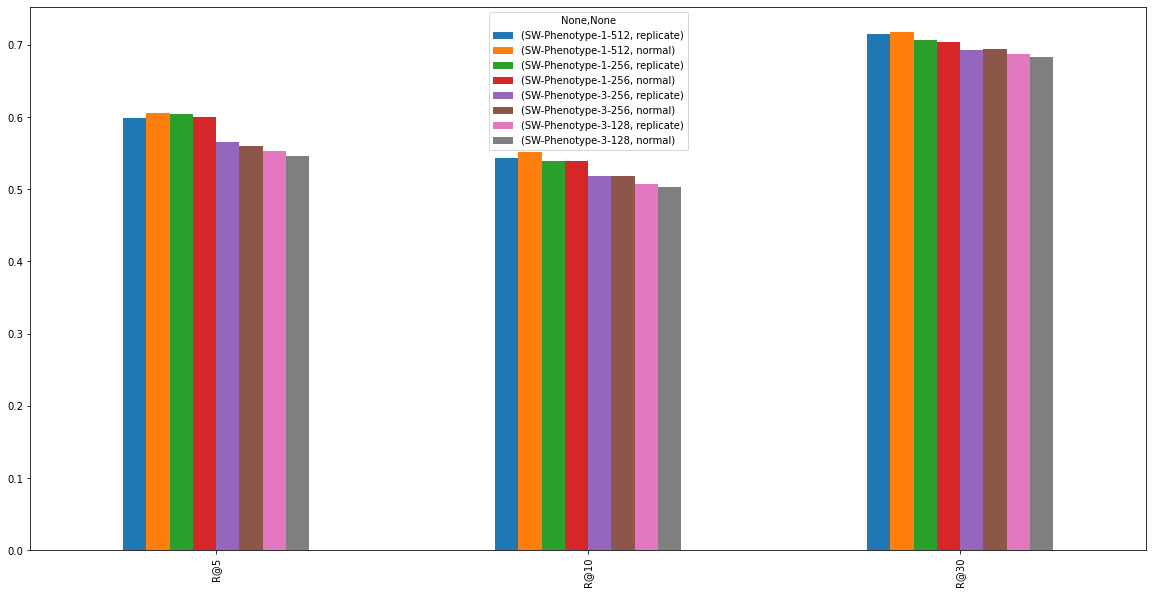

In [197]:
df.T.plot(kind='bar',figsize=(20,10))

In [230]:
get_keys('mortality',lst)

["results.mimic.['diagnoses'].['mortality'].normal.its:1.dropout.ccs.[1].25.256.ancestry:full"]

In [231]:
df = append["results.mimic.['diagnoses'].['phenotype'].normal.its:1.dropout.cat_level.[184].25.256"]
mimic_n = df.phenotype.apply(to_series)[metrics]
df = append["results.mimic.['diagnoses'].['phenotype'].replicate.its:1.dropout.cat_level.[184].25.256"]
mimic_r = df.phenotype.apply(to_series)[metrics]

tuples = [metrics,['replicate','normal']]
index = pd.MultiIndex.from_product(tuples)
df = mimic_r.merge(mimic_n,right_index=True,left_index=True).T
df.index= index
df= df.T
df.index = ['-'.join(i.split('-')[2:]) for i in df.index]
df.T.plot(kind='bar')

KeyError: "results.mimic.['diagnoses'].['phenotype'].normal.its:1.dropout.cat_level.[184].25.256"

In [232]:
df = append[f"results.eICU.['diagnoses'].['phenotype'].replicate.its:1.dropout.ccs.[283].25.256"]
eicu_r = df.phenotype.apply(to_series)[metrics].astype(float)
df = append["results.eICU.['diagnoses'].['phenotype'].normal.its:1.dropout.ccs.[283].25.256"]
eicu_n = df.phenotype.apply(to_series)[metrics].astype(float)
tuples = [metrics,['replicate','normal']]
index = pd.MultiIndex.from_product(tuples)
df = eicu_r.merge(eicu_n,right_index=True,left_index=True).T
df.index= index
df= df.T
df.index = ['-'.join(i.split('-')[2:]) for i in df.index]
df.T.plot(kind='bar',figsize=(15,10))

KeyError: "results.eICU.['diagnoses'].['phenotype'].replicate.its:1.dropout.ccs.[283].25.256"

### Dropout

In [233]:
def analyse(dataset='mimic'):
    
    metrics = ["R@5","R@10","R@30"]
    df = append[f"results.{dataset}.['diagnoses'].['phenotype'].normal.its:1.dropout.ccs.[283].25.256.ancestry:full"]
    mimic_d = df.phenotype.apply(to_series)[metrics]
    df = append[f"results.{dataset}.['diagnoses'].['phenotype'].normal.its:1.masking.ccs.[283].25.256.ancestry:full"]
    
    mimic_m = df.phenotype.apply(to_series)[metrics]
    tuples = [metrics,['dropout','masking']]
    index = pd.MultiIndex.from_product(tuples)
    df = mimic_d.merge(mimic_m,right_index=True,left_index=True)
    return df
    df = df.astype(float)
    df.index= index
    df= df.T
    df.index = ['-'.join(i.split('-')[2:]) for i in df.index]
    df.T.plot(kind='bar',fontsize=10,figsize=(12,10))
    return df

In [234]:
def to_table(dataset='mimic',idxmx= 'SW-Phenotype-1-512'):
    metrics = ["R@5","R@10","R@30"]
    df = append[f"results.{dataset}.['diagnoses'].['phenotype'].normal.its:1.dropout.ccs.[283].25.256.ancestry:full"]
    mimic_d = df.phenotype.apply(to_series)[metrics]
    df = append[f"results.{dataset}.['diagnoses'].['phenotype'].normal.its:1.masking.ccs.[283].25.256.ancestry:full"]
    mimic_m = df.phenotype.apply(to_series)[metrics]
    df = pd.concat([mimic_d,mimic_m]).loc[idxmx]
    df.index = ['dropout','masking']
    return df.astype(float)

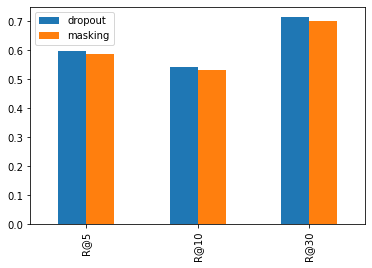

In [235]:
to_table('mimic').T.plot(kind='bar').get_figure().savefig('abdm.png')

In [236]:
analyse('eICU')

,R@5_x,R@10_x,R@30_x,R@5_y,R@10_y,R@30_y
SW-Phenotype-1-512,0.456434,0.5703174,0.8157389,0.4684823,0.57326245,0.8178176


### Ancestry

In [237]:
path = ['mimic','ancestry:full','phenotype','[283]']

res = lst
for item in path:
    res = get_keys(item,res)
res[0]

"results.mimic.['diagnoses'].['phenotype'].normal.its:1.masking.ccs.[283].25.256.ancestry:full"

In [238]:
metrics = ["R@5","R@10","R@15","R@30"]
df = append["results.mimic.['diagnoses'].['phenotype'].normal.its:1.dropout.ccs.[283].25.256.ancestry:partial"]
mimic_pa = df.phenotype.apply(to_series).astype(float)[metrics]
df = append["results.mimic.['diagnoses'].['phenotype'].normal.its:1.dropout.ccs.[283].25.256.ancestry:full"]
mimic_a = df.phenotype.apply(to_series).astype(float)[metrics]
df = append["results.mimic.['diagnoses'].['phenotype'].normal.its:1.dropout.ccs.[283].25.256.ancestry:no"]
mimic_na = df.phenotype.apply(to_series).astype(float)[metrics]

df = mimic_pa.merge(mimic_a,right_index=True,left_index=True).merge(mimic_na,right_index=True,left_index=True).T
df = df.sort_index()
metrics = ["R@10","R@15","R@30","R@5"]
tuples = [metrics,['partial-ancestry','ancestry','no-ancestry']]
index = pd.MultiIndex.from_product(tuples)
df.index= index
df= df.T
df.index = ['-'.join(i.split('-')[2:]) for i in df.index]
#df.T.plot(kind='bar',fontsize=10,figsize=(12,10))
#df.index

In [239]:
df_t = pd.concat([mimic_a,mimic_pa,mimic_na]).loc[idxmx]
df_t.index =['full','partial','no-ancestry']

In [240]:
print(df_t.to_latex(caption='Ancestry evaluation',label='abaeval'))

\begin{table}
\centering
\caption{Ancestry evaluation}
\label{abaeval}
\begin{tabular}{lrrrr}
\toprule
{} &       R@5 &      R@10 &      R@15 &      R@30 \\
\midrule
full        &  0.598178 &  0.543553 &  0.573256 &  0.714664 \\
partial     &  0.570809 &  0.525347 &  0.557101 &  0.707510 \\
no-ancestry &  0.539129 &  0.493019 &  0.526795 &  0.675303 \\
\bottomrule
\end{tabular}
\end{table}



In [241]:
mimic_na

,R@5,R@10,R@15,R@30
SW-Phenotype-0-512,0.528827,0.489250,0.525731,0.675550
SW-Phenotype-1-512,0.539129,0.493019,0.526795,0.675303
SW-Phenotype-2-512,0.516480,0.476062,0.509863,0.670162


In [242]:
def analyse(variant):
    t = df.loc[variant].reset_index(level=1)
    p_a = t[t['level_1']=='partial-ancestry'].drop(columns='level_1').rename(columns={variant:'partial'})
    a = t[t['level_1']=='ancestry'].drop(columns='level_1').rename(columns={variant:'fully'})
    n_a = t[t['level_1']=='no-ancestry'].drop(columns='level_1').rename(columns={variant:'none'})

    plt = a.merge(p_a,right_index=True,left_index=True).merge(n_a,right_index=True,left_index=True).plot(kind='bar',figsize=(12,10))
    return plt.get_figure()

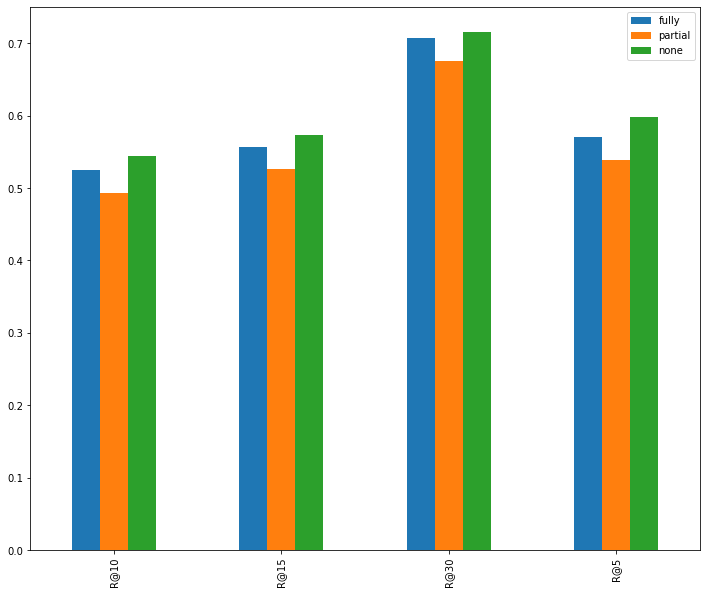

In [243]:
analyse('1-512').savefig('ancestry.png')

In [246]:
metrics = ["R@5","R@10","R@15","R@30"]
df = append["results.mimic.['diagnoses'].['phenotype'].normal.its:1.dropout.ccs.[283].25.256.ancestry:full"]
mimic = df.phenotype.apply(to_series).astype(float)[metrics]
df = append["results.mimic.['diagnoses'].['phenotype'].normal.its:1.dropout.ccs.[283].25.256.ancestry:full.unidirected"]
mimic_ud = df.phenotype.apply(to_series).astype(float)[metrics]

In [249]:
pd.concat([mimic,mimic_ud])

,R@5,R@10,R@15,R@30
SW-Phenotype-0-128,0.561716,0.499973,0.524324,0.663612
SW-Phenotype-0-256,0.595858,0.529936,0.551938,0.687316
SW-Phenotype-0-50,0.503440,0.452937,0.477416,0.626043
SW-Phenotype-0-512,0.591849,0.535087,0.560438,0.703526
SW-Phenotype-1-128,0.588631,0.524834,0.548995,0.690556
SW-Phenotype-1-256,0.603538,0.539336,0.564944,0.706046
SW-Phenotype-1-50,0.493520,0.442075,0.472833,0.627137
SW-Phenotype-1-512,0.598178,0.543553,0.573256,0.714664
SW-Phenotype-2-128,0.570311,0.514220,0.542489,0.689227
SW-Phenotype-2-256,0.591973,0.531682,0.559702,0.701107


### Directed

In [89]:
df = append["results.mimic.['diagnoses'].['phenotype'].normal.its:1.dropout.ccs.[283].25.256.ancestry:full.unidirected"]
unidirected = df.phenotype.apply(pd.Series)[metrics]
df = append["results.mimic.['diagnoses'].['phenotype'].normal.its:1.dropout.ccs.[283].25.256.ancestry:full"]
directed = df.phenotype.apply(pd.Series)[metrics]

In [132]:
index = directed.merge(unidirected,right_index=True,left_index=True).index
subset = index
#[idxmx,"SW-Phenotype-1-256","SW-Phenotype-3-256","SW-Phenotype-3-128"]
df = pd.concat([unidirected,directed]).loc[subset].astype(float)
tuples = [subset,['unidirected','directed']]
index = pd.MultiIndex.from_product(tuples)
df.index = index

In [137]:
df

R@5      R@10      R@30
SW-Phenotype-0-128 unidirected  0.571893  0.504667  0.666462
                   directed     0.561716  0.499973  0.663612
SW-Phenotype-0-256 unidirected  0.597813  0.530644  0.690890
                   directed     0.595858  0.529936  0.687316
SW-Phenotype-0-50  unidirected  0.506542  0.454514  0.627154
                   directed     0.503440  0.452937  0.626043
SW-Phenotype-0-512 unidirected  0.595484  0.534585  0.701431
                   directed     0.591849  0.535087  0.703526
SW-Phenotype-1-128 unidirected  0.591342  0.526368  0.692086
                   directed     0.588631  0.524834  0.690556
SW-Phenotype-1-256 unidirected  0.603733  0.546607  0.709807
                   directed     0.603538  0.539336  0.706046
SW-Phenotype-1-50  unidirected  0.531529  0.480587  0.654651
                   directed     0.493520  0.442075  0.627137
SW-Phenotype-1-512 unidirected  0.611991  0.552389  0.711293
                   directed     0.598178  0.543553  0.714664
SW-Phenotype-2-128 unidirected  0.577404  0.516909  0.692741
                   directed     0.570311  0.514220  0.689227
SW-Phenotype-2-256 unidirected  0.589289  0.533675  0.702825
                   directed     0.591973  0.531682  0.701107
SW-Phenotype-2-50  unidirected  0.517422  0.475952  0.657358
                   directed     0.517716  0.474403  0.659205
SW-Phenotype-3-128 unidirected  0.566809  0.515822  0.687111
                   directed     0.553218  0.507350  0.686549
SW-Phenotype-3-256 unidirected  0.574480  0.519376  0.695591
                   directed     0.565129  0.518120  0.692441
SW-Phenotype-3-50  unidirected  0.515067  0.477115  0.658945
                   directed     0.491813  0.460183  0.650547

In [133]:
print(df.applymap(lambda x: round(x,3)).to_latex(label='tab:uniab',caption='Unidirected vs Directed'))

\begin{table}
\centering
\caption{Unidirected vs Directed}
\label{tab:uniab}
\begin{tabular}{llrrr}
\toprule
                  &          &    R@5 &   R@10 &   R@30 \\
\midrule
SW-Phenotype-0-128 & unidirected &  0.572 &  0.505 &  0.666 \\
                  & directed &  0.562 &  0.500 &  0.664 \\
SW-Phenotype-0-256 & unidirected &  0.598 &  0.531 &  0.691 \\
                  & directed &  0.596 &  0.530 &  0.687 \\
SW-Phenotype-0-50 & unidirected &  0.507 &  0.455 &  0.627 \\
                  & directed &  0.503 &  0.453 &  0.626 \\
SW-Phenotype-0-512 & unidirected &  0.595 &  0.535 &  0.701 \\
                  & directed &  0.592 &  0.535 &  0.704 \\
SW-Phenotype-1-128 & unidirected &  0.591 &  0.526 &  0.692 \\
                  & directed &  0.589 &  0.525 &  0.691 \\
SW-Phenotype-1-256 & unidirected &  0.604 &  0.547 &  0.710 \\
                  & directed &  0.604 &  0.539 &  0.706 \\
SW-Phenotype-1-50 & unidirected &  0.532 &  0.481 &  0.655 \\
                  & directed &

In [66]:
df = directed.merge(unidirected,right_index=True,left_index=True).astype(float)

In [33]:
df = df.T

In [34]:
df.index=index

<AxesSubplot:>

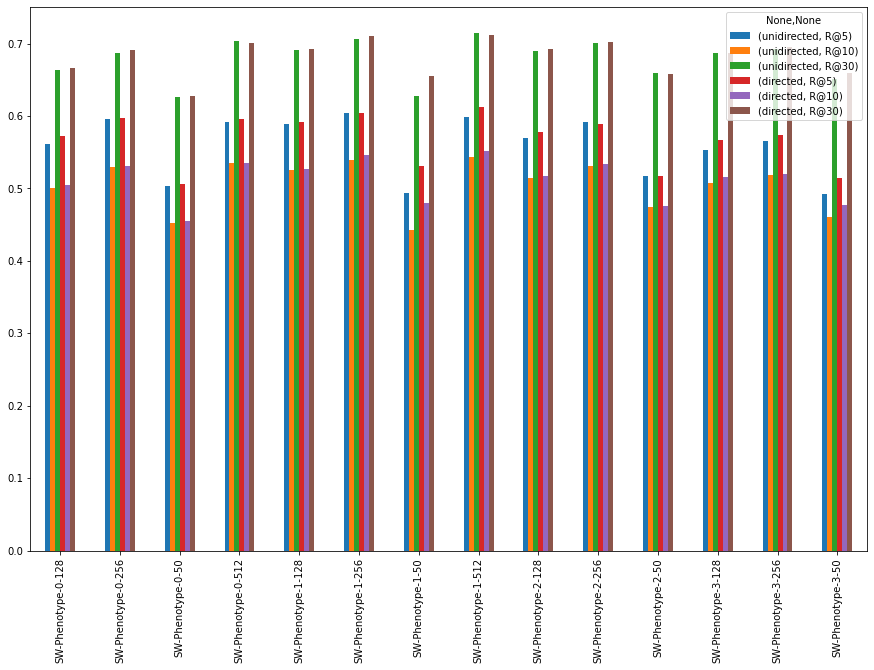

In [38]:
df.T.plot(kind='bar',figsize=(15,10))

In [14]:
get_keys(':5',lst)

[]